In [1]:
import gym
from gym import wrappers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
success_per_episode_dict = {}

In [3]:
def cross_lake(alpha=0.1, epsilon=0.2):
    print(f'alpha: {alpha}, epsilon: {epsilon}')
    '''
    Wrappers will allow us to add functionality to environments, such as modifying
    observations and rewards to be fed to our agent.
    '''
    # deterministic state transition
    env = gym.make('FrozenLake-v0', is_slippery=False)  
    # Monitor can write information about your agent’s performance in a file
    env = wrappers.Monitor(env, './frozen_lake_results', force=True)

    # Action value initialization
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    # to compute the number of visits for (state, action) pairs
    n_s_a = np.zeros([env.observation_space.n, env.action_space.n])

    num_episodes = 100000
    # epsilon = 0.2
    # to record the return at the starting point for all episodes.  [0, 1] (fail, success)
    rList = []
    success_per_episode_list = [0]
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        # done is True when the agent reaches to the hole or goal.
        done = False        
        # to record the (state, action) trace for the current episode.
        results_list = []
        result_sum = 0.0
        while not done:
            if np.random.rand() < epsilon:
                # Random action selection
                action = env.action_space.sample()
            else:
                # Greedy action selection
                action = np.argmax(Q[state, :])
            new_state, reward, done, _ = env.step(action)
            # Append (state, action) for tracing
            results_list.append((state, action))
            # Sum of rewards (What is the discount value?)
            result_sum += reward
            state = new_state
            rAll += reward
        rList.append(rAll)
        for (state, action) in results_list:
            # First visit MC on every-visit 
            n_s_a[state, action] += 1.0
            # variable or constant step size?
            # Uncomment under line for constant step size
            # alpha = 1.0 / n_s_a[state, action]
            Q[state, action] += alpha * (result_sum - Q[state, action])
        if i % 500 == 0 and i is not 0:
            # i: Variable alpha
            success_rate = sum(rList) / i
            success_per_episode_list.append(success_rate)
            # print(f"Success rate of {i}th episode: {success_rate:.3f}")
                 
    avg_success_rate = sum(rList) / num_episodes
    # print(f"Average Success rate: {avg_success_rate:.3f}")
    success_per_episode_list.append(avg_success_rate)
    success_per_episode_dict[(alpha, epsilon)] = success_per_episode_list
    
    env.close()

<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\stand\AppData\Local\Temp\ipykernel_12480\3939217676.py:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if i % 500 == 0 and i is not 0:


In [6]:
alpha_list= [round(i, 7) for i in np.linspace(0.000001, 0.3, 10).tolist()]
eplison_list = [0.2, 0.3, 0.4, 0.5]
for alpha in alpha_list:
    for epsilon in eplison_list:
        cross_lake(alpha, epsilon)


alpha: 1e-06, epsilon: 0.2
alpha: 1e-06, epsilon: 0.3
alpha: 1e-06, epsilon: 0.4
alpha: 1e-06, epsilon: 0.5
alpha: 0.0333342, epsilon: 0.2
alpha: 0.0333342, epsilon: 0.3
alpha: 0.0333342, epsilon: 0.4
alpha: 0.0333342, epsilon: 0.5
alpha: 0.0666674, epsilon: 0.2
alpha: 0.0666674, epsilon: 0.3
alpha: 0.0666674, epsilon: 0.4
alpha: 0.0666674, epsilon: 0.5
alpha: 0.1000007, epsilon: 0.2
alpha: 0.1000007, epsilon: 0.3
alpha: 0.1000007, epsilon: 0.4
alpha: 0.1000007, epsilon: 0.5
alpha: 0.1333339, epsilon: 0.2
alpha: 0.1333339, epsilon: 0.3
alpha: 0.1333339, epsilon: 0.4
alpha: 0.1333339, epsilon: 0.5
alpha: 0.1666671, epsilon: 0.2
alpha: 0.1666671, epsilon: 0.3
alpha: 0.1666671, epsilon: 0.4
alpha: 0.1666671, epsilon: 0.5
alpha: 0.2000003, epsilon: 0.2
alpha: 0.2000003, epsilon: 0.3
alpha: 0.2000003, epsilon: 0.4
alpha: 0.2000003, epsilon: 0.5
alpha: 0.2333336, epsilon: 0.2
alpha: 0.2333336, epsilon: 0.3
alpha: 0.2333336, epsilon: 0.4
alpha: 0.2333336, epsilon: 0.5
alpha: 0.2666668, epsilo

In [8]:
import pickle
with open('success_per_episode_dict.pickle', 'wb') as f:
    pickle.dump(success_per_episode_dict, f, pickle.HIGHEST_PROTOCOL)

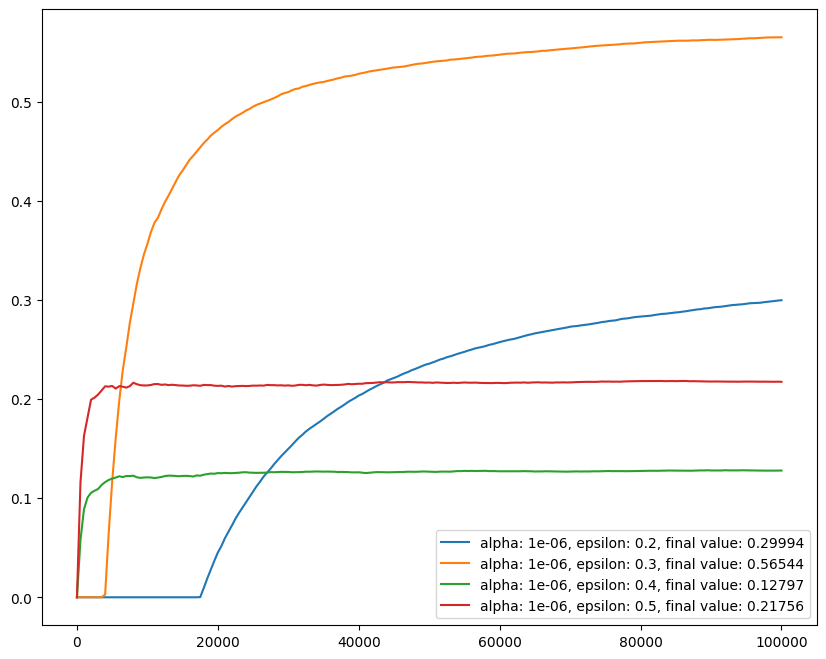

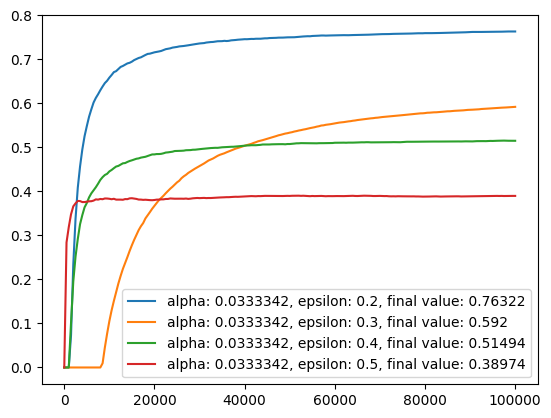

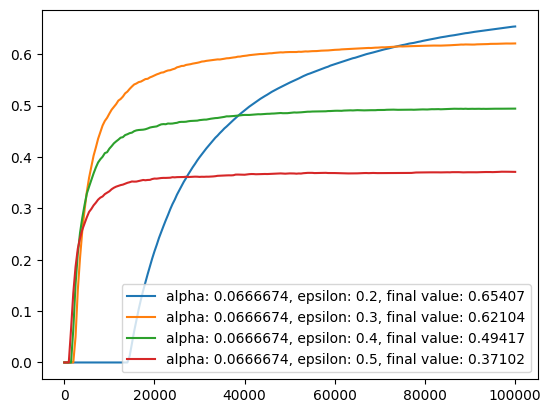

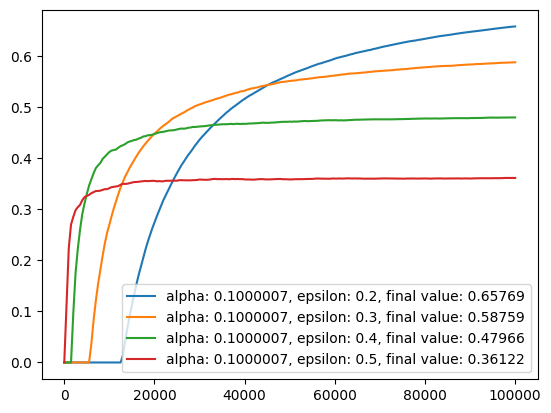

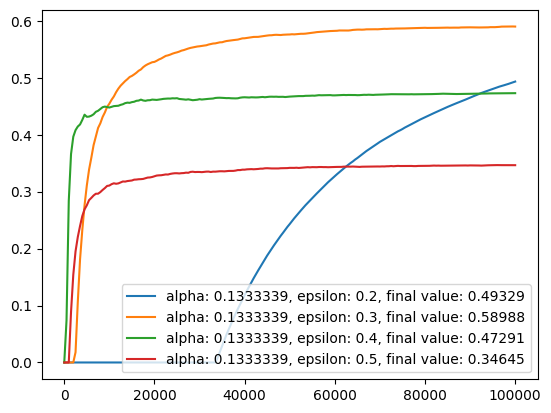

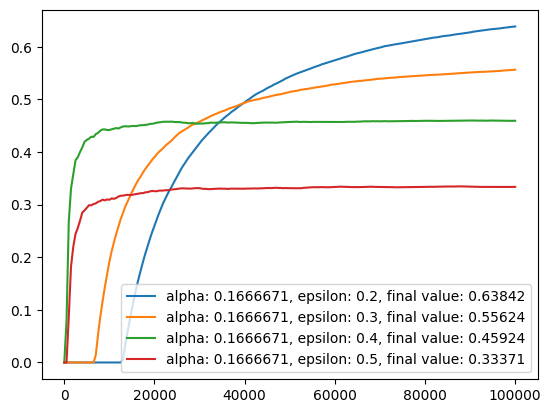

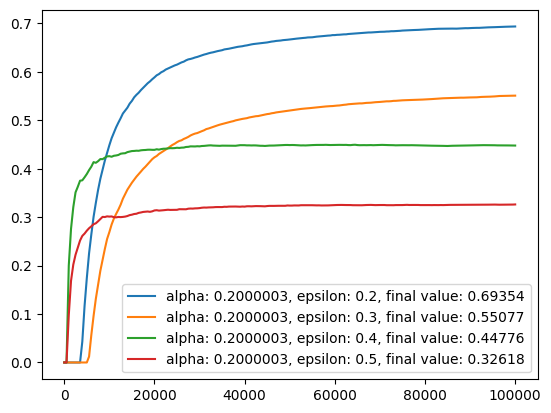

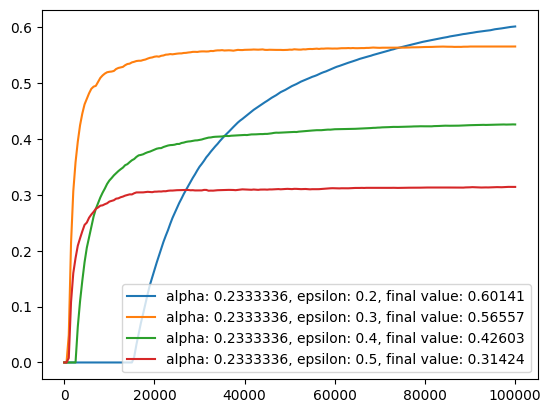

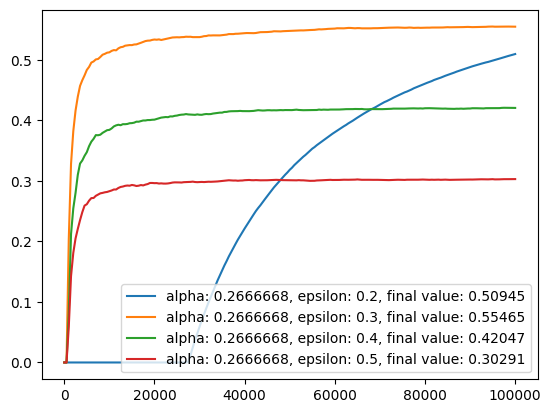

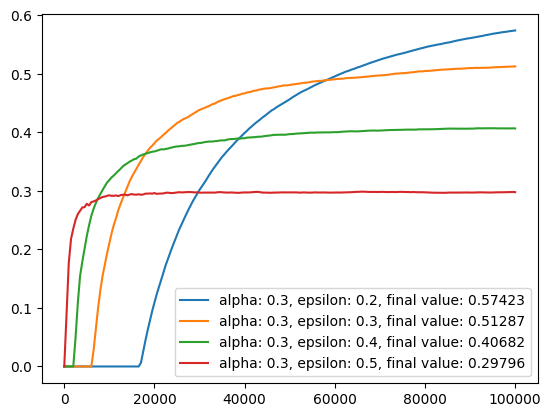

In [12]:
plt.figure(figsize=(10, 8))
x = [i for i in range(0, 100001, 500)]
iter_num = 0
for alpha in alpha_list:
    for epsilon in eplison_list:
        value = success_per_episode_dict[(alpha, epsilon)]
        # plt.plot(x, value, label=f'alpha: {alpha}, epsilon: {epsilon}')
        plt.plot(x, value, label=f'alpha: {alpha}, epsilon: {epsilon}, final value: {value[-1]}')
        plt.legend()
    # To plot the graph uncomment the below line 
    # plt.show()
    # To save the graph
    plt.savefig(f'result_{iter_num}.png')
    iter_num += 1
    plt.close()  